<a href="https://colab.research.google.com/github/Shreyas-s14/UE20CS203--SDS-/blob/main/datavis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print('Hello')

Hello


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import io
import seaborn as sns


In [3]:
df = pd.read_csv("exams.csv")

In [4]:
df

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group E,high school,free/reduced,completed,81,74,70
1,male,group A,high school,standard,none,56,54,46
2,female,group C,some college,standard,none,75,77,73
3,female,group A,associate's degree,standard,none,49,50,57
4,female,group B,associate's degree,free/reduced,none,47,57,51
...,...,...,...,...,...,...,...,...
95,male,group E,associate's degree,standard,none,82,68,65
96,male,group C,high school,standard,none,89,89,79
97,female,group E,associate's degree,standard,completed,100,100,100
98,female,group B,high school,standard,none,72,73,70


Text(0.5, 1.0, 'Bar graph')

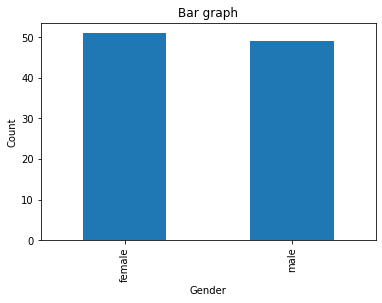

In [6]:
df.gender.value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Bar graph')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


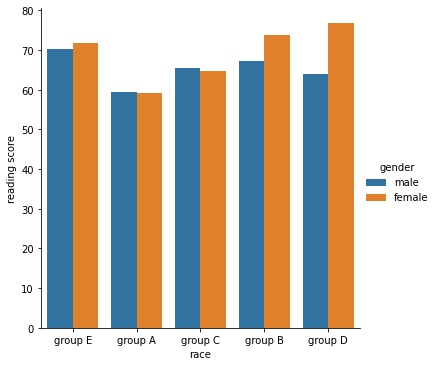

In [7]:
sns.factorplot(x='race',y='reading score',hue = 'gender',data = df,kind='bar',ci=None)

In [8]:
flights = sns.load_dataset('flights')


In [10]:
flights


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [11]:
flights = flights.pivot('month','year','passengers')


In [12]:
flights


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


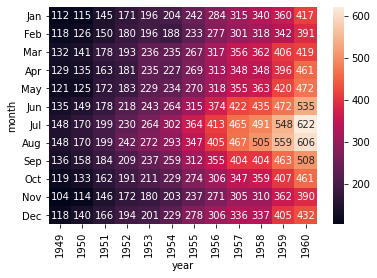

In [13]:

sns.heatmap(flights,annot=True,fmt='d')


In [14]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [15]:
agg_tips = tips.groupby(['day', 'sex'])['tip'].sum().fillna(0)
agg_tips


day   sex   
Thur  Male       89.41
      Female     82.42
Fri   Male       26.93
      Female     25.03
Sat   Male      181.95
      Female     78.45
Sun   Male      186.78
      Female     60.61
Name: tip, dtype: float64

In [17]:
agg_tips = tips.groupby(['day', 'sex'])['tip'].sum().unstack().fillna(0)
agg_tips

sex,Male,Female
day,,
Thur,89.41,82.42
Fri,26.93,25.03
Sat,181.95,78.45
Sun,186.78,60.61


Text(0.5, 1.0, 'Tips by Day and Gender')

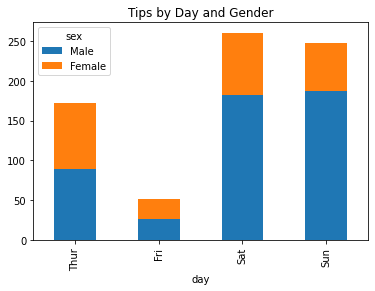

In [19]:

from matplotlib import pyplot as plt
# Very simple one-liner using our agg_tips DataFrame.
agg_tips.plot(kind='bar', stacked=True)
# Just add a title and rotate the x-axis labels to be horizontal.
plt.title('Tips by Day and Gender')
#plt.xticks(rotation=0, ha='center')

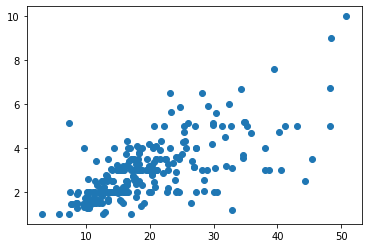

In [20]:
plt.scatter(tips['total_bill'],tips['tip'])
plt.show()

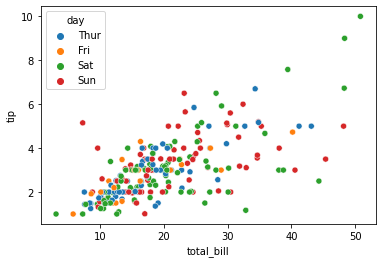

In [21]:
sns.scatterplot(x='total_bill',y='tip',data=tips,hue='day')
plt.show()

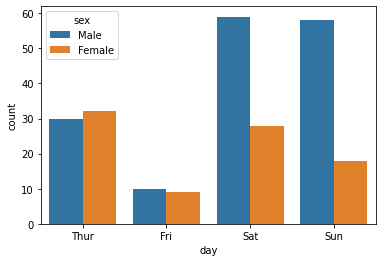

In [22]:
sns.countplot(x='day',data=tips,hue='sex')
plt.show()

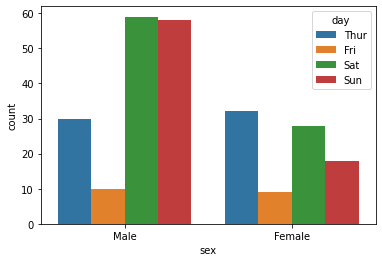

In [23]:
sns.countplot(x='sex',data=tips,hue='day')
plt.show()

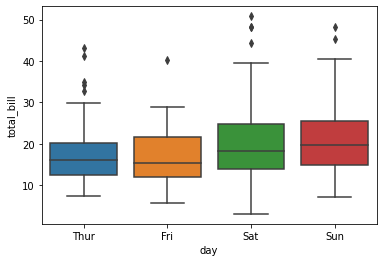

In [24]:
sns.boxplot(x='day',y='total_bill',data=tips)
plt.show()

In [25]:

a=tips.groupby('sex').mean()['total_bill']

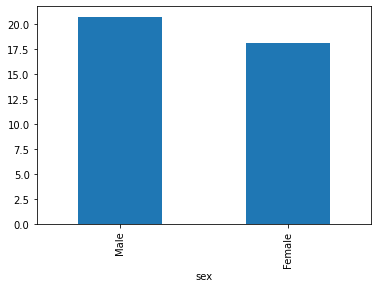

In [26]:
a.plot(kind='bar')
plt.show()

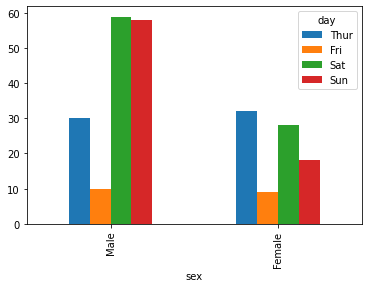

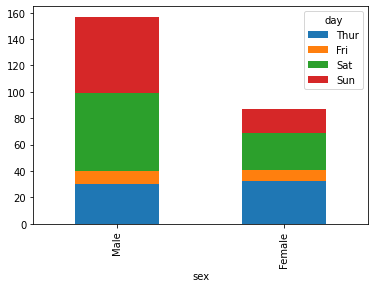

In [27]:
pd.crosstab(tips['sex'],tips['day']).plot(kind='bar')
plt.show()
pd.crosstab(tips['sex'],tips['day']).plot(kind='bar',stacked=True)
plt.show()